In [48]:
%matplotlib inline

In [49]:
import math
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from brainflow.data_filter import DataFilter, AggOperations, WaveletTypes, NoiseEstimationLevelTypes, WaveletExtensionTypes, ThresholdTypes, WaveletDenoisingTypes
from brainflow.data_filter import DataFilter, FilterTypes, AggOperations, NoiseTypes, DetrendOperations, WindowOperations

In [83]:
df = pd.read_csv('data2.csv')

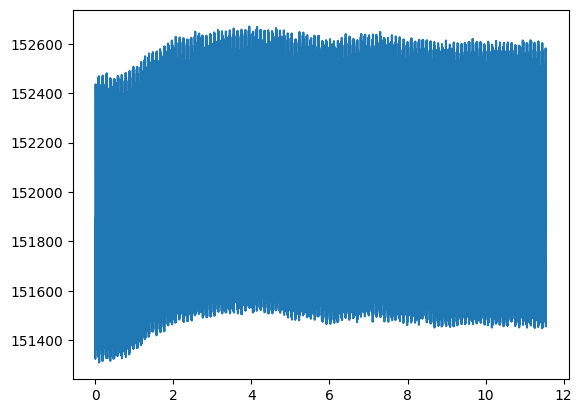

In [84]:
sampling_rate = 250
initial_time = df['Counter'][0]
x_ = (df['Counter']-initial_time) / sampling_rate
Oz = df['EEG 8']

plt.plot(x_, Oz)

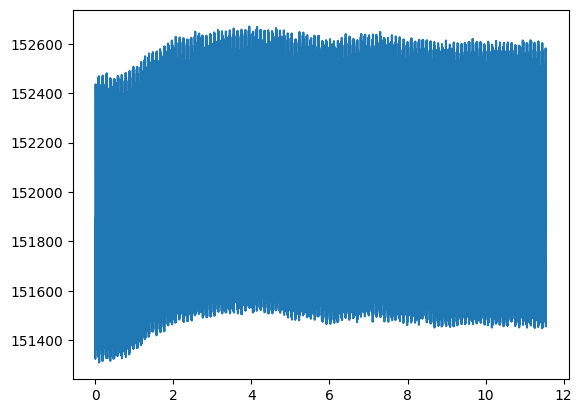

In [85]:
eeg_data = df['EEG 8'].to_numpy()

# start = 2*sampling_rate
# eeg_data = eeg_data[start:]
# xs = x_[start:]-x_[start]

plt.plot(x_, eeg_data)

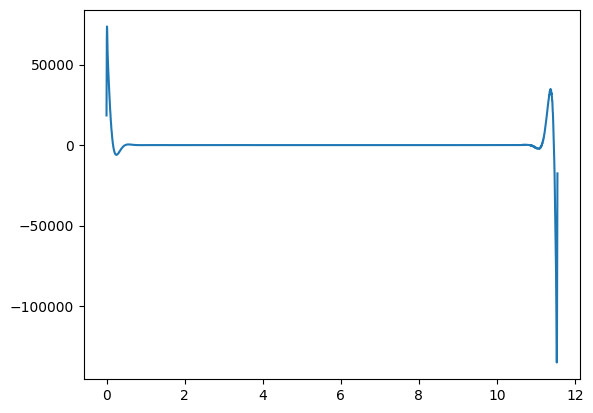

In [86]:
filtered_eeg = eeg_data
DataFilter.perform_bandpass(filtered_eeg, sampling_rate, 2.0, 30.0, 2, FilterTypes.BUTTERWORTH_ZERO_PHASE, 0)
DataFilter.perform_bandstop(filtered_eeg, sampling_rate, 58.0, 62.0, 5, FilterTypes.BUTTERWORTH_ZERO_PHASE, 0)
# filtered_eeg = filtered_eeg[500:3000]
# xs = xs[500:3000]
plt.plot(x_, filtered_eeg)

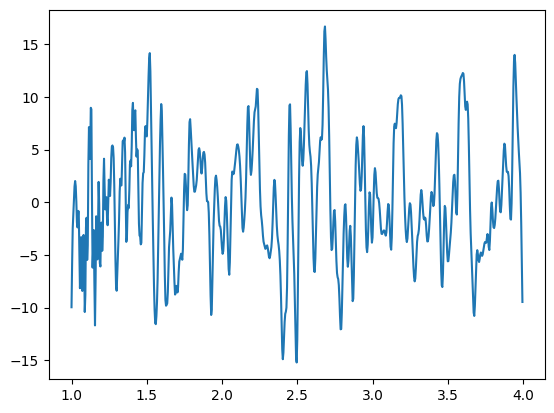

In [94]:
baseline_eeg = filtered_eeg[250*1:250*4]
baseline_time = x_[250*1:250*4]
plt.plot(baseline_time, baseline_eeg)

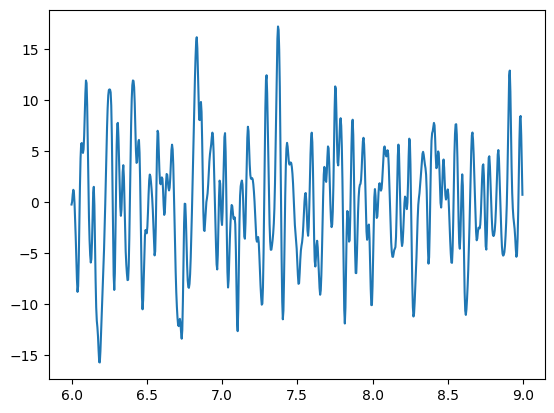

In [102]:
target_eeg = filtered_eeg[250*6:250*9]
target_time = x_[250*6:250*9]
plt.plot(target_time, target_eeg)

(0.0, 40.0)

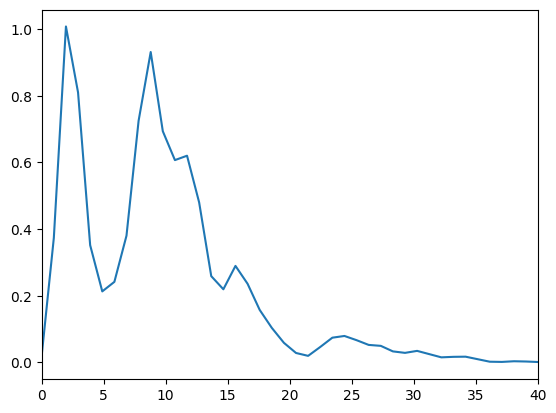

In [103]:
nfft = DataFilter.get_nearest_power_of_two(sampling_rate)
baseline_psd = DataFilter.get_psd_welch(baseline_eeg, nfft, nfft // 2, sampling_rate, WindowOperations.BLACKMAN_HARRIS.value)
plt.plot(baseline_psd[1], baseline_psd[0])
plt.xlim(0, 40)

(0.0, 40.0)

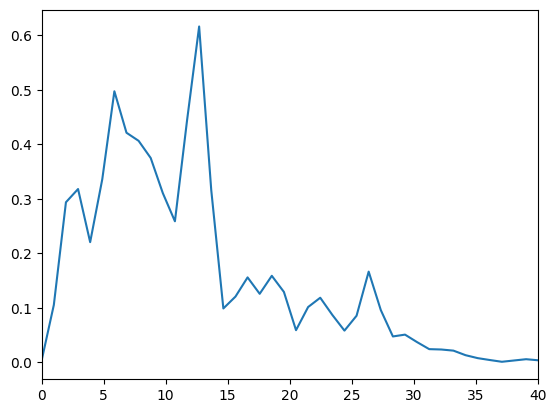

In [104]:
target_psd = DataFilter.get_psd_welch(target_eeg, nfft, nfft // 2, sampling_rate, WindowOperations.BLACKMAN_HARRIS.value)
plt.plot(target_psd[1], target_psd[0])
plt.xlim(0, 40)

(0.0, 40.0)

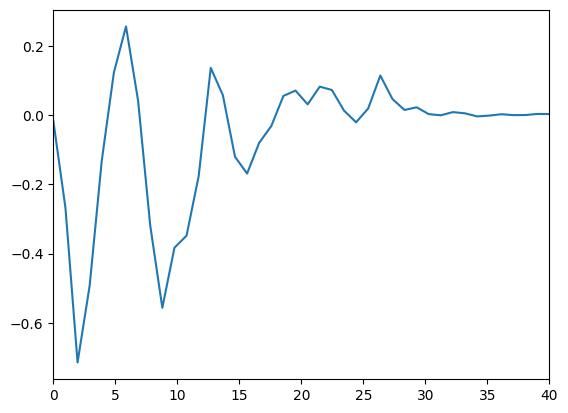

In [112]:
subtracted_psd = target_psd[0] - baseline_psd[0]
plt.plot(target_psd[1], subtracted_psd)
plt.xlim(0, 40)